**Polynomial Regression :**

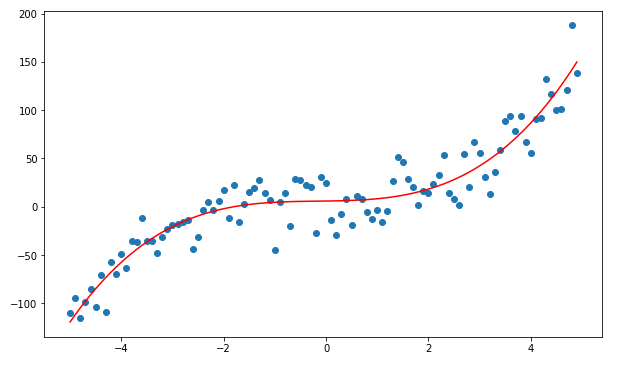

Sometimes we have data that does not merely follow a linear trend. We sometimes have data that follows a polynomial trend. Therefore, we are going to use polynomial regression.

Before digging into its implementation, we need to know how the graphs of some primary polynomial data look.


**Below is the formula for polynomial regression :**

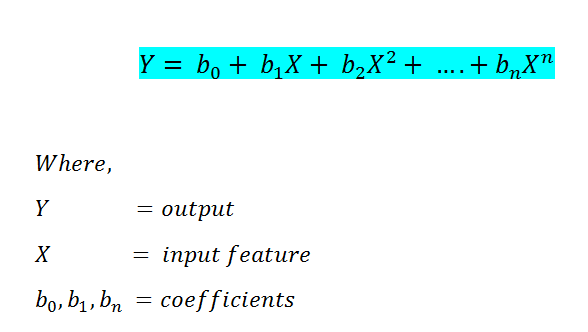

Now in the previous regression models, we used sci-kit learn library for implementation. Now in this, we are going to use Normal Equation to implement it. Here notice that we can use scikit-learn for implementing polynomial regression also, but another method will give us an insight into how it works.

***The equation goes as follows :***

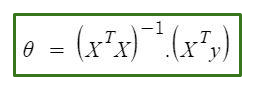

**In the equation above :**
θ: hypothesis parameters that define it the best.
X: input feature value of each instance.
Y: Output value of each instance.

**Hypothesis Function for Polynomial Regression**

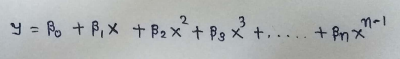

***The main matrix in the standard equation :***

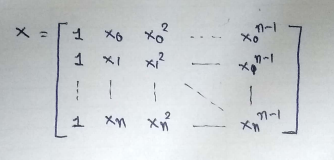

**Step by step implementation in Python :**

***a. Import the required libraries:***

In [1]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt

***b. Generate the data points :***

We are going to generate a dataset for implementing our polynomial regression.

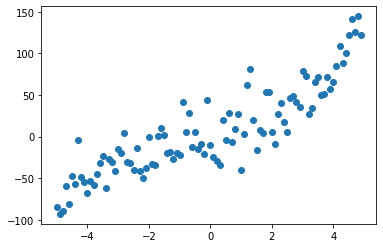

In [2]:
# Generate datapoints:
x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y)

***c. Initialize x,x²,x³ vectors :***

We are taking the maximum power of x as 3. So our X matrix will have X, X², X³.

In [3]:
# Make polynomial data:
x1 = x
x2 = np.power(x1,2)
x3 = np.power(x1,3)

***d. Column-1 of X matrix:***

The 1st column of the main matrix X will always be 1 because it holds the coefficient of beta_0.


In [9]:
# First column of matrix X:
n = 100
x_bias = np.ones((n,1))

***e. Form the complete x matrix :***

Look at the matrix X at the start of this implementation. We are going to create it by appending vectors.

In [11]:
# Reshaping data:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

In [12]:
# Form the complete x matrix:
x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

***f. Transpose of the matrix :***

We are going to calculate the value of theta step-by-step. First, we need to find the transpose of the matrix.

In [13]:
# Finding transpose:
x_new_transpose = np.transpose(x_new)

***g. Matrix multiplication :***

After finding the transpose, we need to multiply it with the original matrix. Keep in mind that we are going to implement it with a normal equation, so we have to follow its rules.

In [14]:
# Finding dot product of original and transposed matrix :
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

***h. The inverse of a matrix :***

Finding the inverse of the matrix and storing it in temp1.

In [15]:
# Finding Inverse:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)


***i. Matrix multiplication :***

Finding the multiplication of transposed X and the Y vector and storing it in the temp2 variable.


In [16]:
# Finding the dot product of transposed x and y :
temp_2 = x_new_transpose.dot(y)

***j. Coefficient values :***

To find the coefficient values, we need to multiply temp1 and temp2. See the Normal Equation formula.

In [17]:
# Finding coefficients:
theta = temp_1.dot(temp_2)
theta

array([-1.61127335,  7.37919243,  1.18211289,  0.58699732])

***k. Store the coefficients in variables :***

Storing those coefficient values in different variables.

In [18]:
# Store coefficient values in different variables:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

***l. Plot the data with curve :***

Plotting the data with the regression curve.

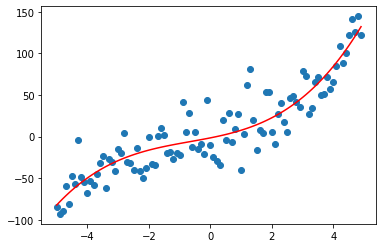

In [19]:
# Plot the polynomial curve:
plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="red")


***m. Prediction function :***

Now we are going to predict the output using the regression curve.

In [20]:
# Prediction function:
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
 y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
 return y_pred
# Making predictions:
pred = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)


***n. Error function :***

Calculate the error using mean squared error function.


In [21]:
# Calculate accuracy of model:
def err(y_pred,y):
 var = (y - y_pred)
 var = var*var
 n = len(var)
 MSE = var.sum()
 MSE = MSE/n
 return MSE

***o. Calculate the error :***


In [22]:
# Calculating the error:
error = err(pred,y)
error

447.60805742047654